# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [1]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [3]:
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [7]:
df_data.shape

(150, 4)

1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [4]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1.4. `df_data` に欠損値がないかを確認しましょう。

In [5]:
df_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [10]:
df_target.sample(n=10)

,target
51,1
76,1
21,0
32,0
115,2
83,1
70,1
57,1
20,0
10,0


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

In [11]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

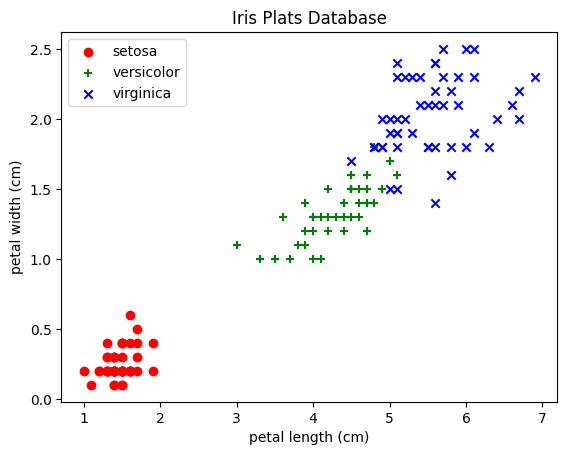

In [34]:
df_merged = pd.merge(df_data, df_target,left_index=True, right_index=True)
setosa =df_merged[df_merged["target"]==0]
versicolor =df_merged[df_merged["target"]==1]
virginica =df_merged[df_merged["target"]==2]
df_merged

#plot
plt.scatter(setosa["petal length (cm)"], setosa["petal width (cm)"], label="setosa",c="r")
plt.scatter(versicolor["petal length (cm)"], versicolor["petal width (cm)"], label="versicolor",c="g", marker="+")
plt.scatter(virginica["petal length (cm)"], virginica["petal width (cm)"], label="virginica", c="b", marker="x")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("Iris Plats Database")
plt.legend()
plt.show

## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=0)

4.2. 本当に4:1に分割できているか確認しましょう。

In [57]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (120, 4)
x_test: (30, 4)
y_train: (120, 1)
y_test: (30, 1)


x_train :  (120, 4)
x_test :  (30, 4)
y_train :  (120, 1)
y_test :  (30, 1)


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [60]:
model.fit(x_train, y_train)

c:\Users\a123o\Desktop\PG\BasicPython\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [61]:
test = model.predict(x_test)

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test)

1.0

実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。